# Thailand Food Delivery Market EDA Project

This project aim to perform data analytics on Thialand food delivery market in restaurant section. 🧐

## Dataset
Thailand restaurant dataset from Lineman application, food delivery application in Thailand. This data source is available on kaggle website, [300000+ Restaurants in Southeast Asia -- Thailand](https://www.kaggle.com/datasets/polartech/300000-restaurants-in-southeast-asia-thailand).

## Contents

1. Data Wrangling.

3. K-Means Clustering.

4. Dimension Data Modeling.

### Import Essential Libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = "tahoma" # Thai front

# warning hiding
import warnings
warnings.filterwarnings('ignore')

### 1. Data Wrangling

### Data Preparation and Cleaning

Import data into workspace.

In [3]:
# import csv data
raw = pd.read_csv("Datasets/Lineman_Shops.csv")

Take a first look of the data set.

In [3]:
print("shape: "+ str(raw.shape))
display(raw.head(2))

shape: (316192, 28)


,TID,id,gid,id_source,name,distance,cuisine,price_level,lat,lon,image_url,category,category_international,opening_hours,id_chain,name_chain,reviews_nr,rating,address,facebook,phone,email,url,RunID,RunDate,InsertUpdateTime,searched_lat,searched_lon
0,2577,216531.0,09VwpBTRUiuSWzlHXurkDECu4nYpEF,216531Ae,Mister Donut นราธิวาส,56400.107069,ของหวาน/เบเกอรี/เค้ก,ต่ำกว่า 100 บาท,6.434885,101.824171,https://img.wongnai.com/p/_-x_/2015/11/30/ae2e...,ของหวาน/เบเกอรี/เค้ก,Dessert/Bakery/Cake,"{'open': True, 'message': 'จนถึง 17:00', 'temp...",10.0,Mister Donut (มิสเตอร์ โดนัท),2,3.09,"{'street': '4136', 'hint': 'ร้านอยู่ติดกับเซเว...",https://www.facebook.com/MisterDonutThailand/,084-751-6497,NaN,https://www.wongnai.com/delivery/businesses/21...,36543,2021-06-29 11:55:33,2021-06-29 11:55:41,5.9333,101.9
1,2578,732344.0,09VxKVu1ExiIGx68FoCs2bzPMsiZFO,732344qz,เตี๋ยวตุ๋นมั้ย by Kunla,58042.506818,ก๋วยเตี๋ยว,ต่ำกว่า 100 บาท,6.447599,101.810208,https://img.wongnai.com/p/_-x_/2021/06/09/39f7...,ก๋วยเตี๋ยว,Noodles,"{'open': False, 'message': 'จะเปิดในวันที่ 1 ก...",NaN,NaN,1,0.00,"{'street': '4136, Khok Khian, Amphoe Mueang Na...",https://www.facebook.com/เตี๋ยวตุ๋นมั้ยby-kunl...,0864983302,NaN,https://www.wongnai.com/delivery/businesses/73...,36543,2021-06-29 11:55:33,2021-06-29 11:55:41,5.9333,101.9


In [114]:
print(raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316192 entries, 0 to 316191
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   TID                     316192 non-null  int64  
 1   id                      316191 non-null  float64
 2   gid                     316191 non-null  object 
 3   id_source               316192 non-null  object 
 4   name                    315826 non-null  object 
 5   distance                316192 non-null  float64
 6   cuisine                 316191 non-null  object 
 7   price_level             185049 non-null  object 
 8   lat                     316192 non-null  float64
 9   lon                     316192 non-null  float64
 10  image_url               316192 non-null  object 
 11  category                316191 non-null  object 
 12  category_international  316191 non-null  object 
 13  opening_hours           298695 non-null  object 
 14  id_chain            

From the table above I list essential columns below that will be emphasized in further analyses:
- **`name`** : restaurant names.

- **`price_level`** : restaurant price levels.

- **`category_international`** : english version of restaurant cetegories.

- **`name_chain`** : name of restaurant with chain (if NA means not part of the chain).

- **`reviews_nr`** : total number of reviews restaurant received.

- **`rating`** : average rating (if Na means 0 rating).

- **`address`** : restaurant location (json format but stored in string).

As the first look
- there is a redundancy in `["cusine", "category", "category_international"]` columns, so I decided to select `category` column which give me more explicit meaning.

- The data points in the `"address"` column are json in string format which need to be adjusted.

- There are only two true numeric columns, `"reviews_nr"` and `"rating"` in the dataset.

- There are some columns that contain missing values.

In [20]:
# list unique values in each object column.
for col in raw.select_dtypes("object").columns:
    print(col, "column")
    print(raw[col].unique())
    print("unique value: " +  str(raw[col].nunique()))
    print("-" * 50)

gid column
['09VwpBTRUiuSWzlHXurkDECu4nYpEF' '09VxKVu1ExiIGx68FoCs2bzPMsiZFO'
 '09VwpBTRUiEFkHTjgOg3ZREG5QyNlm' ... '09VxSWqaD8PtfGOtfUPo1kyFXypISn'
 '09VxSRRDjUqfPcvfF13bvGStEPv1xi' '09VxSWdIohbATkxyJWJyoVQXBWGgAS']
unique value: 316182
--------------------------------------------------
id_source column
['216531Ae' '732344qz' '239153lC' ... '1008518Qa' '1004975HD' '1008285fS']
unique value: 316183
--------------------------------------------------
name column
['Mister Donut นราธิวาส' 'เตี๋ยวตุ๋นมั้ย by Kunla' 'ข้าวขาหมูวอสเบียน' ...
 'ครัวน้องเก้า ( ข้าวมันไก่' "แซ่บE'เม้าส์" 'หมูกะทะ สุมาลี']
unique value: 305110
--------------------------------------------------
cuisine column
['ของหวาน/เบเกอรี/เค้ก' 'ก๋วยเตี๋ยว' 'อาหารจานเดียว' ...
 'อาหารจานเดียว/ร้านริมน้ำ' 'อาหารฟิวชั่น/อาหารญี่ปุ่น/เบเกอรี/เค้ก'
 'อาหารนานาชาติ/Food Truck/อาหารเช้า']
unique value: 9496
--------------------------------------------------
price_level column
['ต่ำกว่า 100 บาท' nan '101 - 250 บาท' '251 - 500 บาท' '5

The `"gid"` column
- There are 10 duplicated data points due to different rows numbers to the original dataset.

The `"price_level` column 
- There are actual 5 price levels, because data duplication, `(levels "251-500 bath" & "101-250 bath" and '101 - 250 บาท' '251 - 500 บาท' they are share the same meaning)`. So I will convert all the price level into english version.



#### Data transformation
- new column for `"address"` columns by extracting specific data, province, district, and sub-district.

- translate the province's name from Thai to English for later visualization.

- column `"region"` to group the restaurant by regions.

- create new categorical column `name_chain` to distinguish the restaurants that are part of the chain.

- identify the restaurant that received actual 0 rating and reviews.

- convert price level from Thai to English to fix the redundancy issue.

separate chain and typical restaurants.

In [4]:
# create new column to subtitude the "name_chain" column
raw["restaurant_type"] = raw["name_chain"].apply(lambda x: "Chain" if type(x) == str else "Typical")

extract province, disctrict, and sub-district from the address column.

In [5]:
# extract province, sub-district, and district in address column
subDistrict= r"'subDistrict': {'id': \d+, 'name': '(.*?)'}"
district = r"'district': {'id': \d+, 'name': '(.*?)'}"
raw["sub_district"] = raw['address'].str.extract(subDistrict)
raw["district"] = raw["address"].str.extract(district)
raw["province"] = raw["address"].str.extract("'city': {'id': \d+, 'name': '([^']+)'}")

group a restaurant by regions.

In [6]:
# create function for geting regions by detecting the provinces
def get_region(city):
    province_data = {
        "Eastern": [
            "อำนาจเจริญ", "บึงกาฬ", "บุรีรัมย์", "ชัยภูมิ", "กาฬสินธุ์", 
            "ขอนแก่น", "เลย", "มหาสารคาม", "มุกดาหาร", "นครพนม", 
            "นครราชสีมา", "หนองบัวลำภู", "หนองคาย", "ร้อยเอ็ด", 
            "สกลนคร", "ศรีสะเกษ", "สุรินทร์", "อุบลราชธานี", "อุดรธานี", "ยโสธร"
        ],
        "Northern": [
            "เชียงใหม่", "เชียงราย", "ลำปาง", "ลำพูน", "แม่ฮ่องสอน",
            "น่าน", "พะเยา", "แพร่", "อุตรดิตถ์", "ตาก",
            "สุโขทัย", "พิษณุโลก", "พิจิตร", "กำแพงเพชร", "เพชรบูรณ์",
            "นครสวรรค์", "อุทัยธานี"
        ],
        "Central": [
            "อ่างทอง", "ชัยนาท", "พระนครศรีอยุธยา", "ลพบุรี",
            "นครปฐม", "นนทบุรี", "ปทุมธานี", "สมุทรปราการ", "สมุทรสาคร",
            "สมุทรสงคราม", "สระบุรี", "สิงห์บุรี", "สุพรรณบุรี", "นครนายก",
            "ฉะเชิงเทรา", "จันทบุรี", "ชลบุรี", "ปราจีนบุรี", "ระยอง",
            "สระแก้ว", "ตราด", "กาญจนบุรี", "ราชบุรี", "เพชรบุรี", "ประจวบคีรีขันธ์"
        ],
        "Southern": [
            "ชุมพร", "นครศรีธรรมราช", "นราธิวาส", "ปัตตานี", "พัทลุง",
            "สงขลา", "สุราษฎร์ธานี", "ยะลา", "กระบี่", "พังงา",
            "ภูเก็ต", "ระนอง", "สตูล", "ตรัง"
        ],
        "Bangkok": ["กรุงเทพมหานคร", "Bangkok"]
    }

    for region, provinces in province_data.items():
        if city in provinces:
            return region

    return np.nan

# Apply the get_region function to the "city" column
raw["region"] = raw["province"].apply(get_region)

translate the province column from Thai to English.

In [7]:
# list for Thai-Eng province mapping
province_mapping = {
    'กระบี่': 'Krabi',
    'กรุงเทพมหานคร': 'Bangkok Metropolis',
    'กาญจนบุรี': 'Kanchanaburi',
    'กาฬสินธุ์': 'Kalasin',
    'กำแพงเพชร': 'Kamphaeng Phet',
    'ขอนแก่น': 'Khon Kaen',
    'จันทบุรี': 'Chanthaburi',
    'ฉะเชิงเทรา': 'Chachoengsao',
    'ชลบุรี': 'Chon buri',
    'ชัยนาท': 'Chai Nat',
    'ชัยภูมิ': 'Chaiyaphum',
    'ชุมพร': 'Chumphon',
    'ตรัง': 'Trang',
    'ตราด': 'Trat',
    'ตาก': 'Tak',
    'นครนายก': 'Nakhon Nayok',
    'นครปฐม': 'Nakhon Pathom',
    'นครพนม': 'Nakhon Phanom',
    'นครราชสีมา': 'Nakhon Ratchasima',
    'นครศรีธรรมราช': 'Nakhon Si Thammarat',
    'นครสวรรค์': 'Nakhon Sawan',
    'นนทบุรี': 'Nonthaburi',
    'นราธิวาส': 'Narathiwat',
    'น่าน': 'Nan',
    'บึงกาฬ': 'Bueng Kan',
    'บุรีรัมย์': 'Buri Ram',
    'ปทุมธานี': 'Pathum Thani',
    'ประจวบคีรีขันธ์': 'Prachuap Khiri Khan',
    'ปราจีนบุรี': 'Prachin Buri',
    'ปัตตานี': 'Pattani',
    'พระนครศรีอยุธยา': 'Phra Nakhon Si Ayutthaya',
    'พะเยา': 'Phayao',
    'พังงา': 'Phangnga',
    'พัทลุง': 'Phatthalung',
    'พิจิตร': 'Phichit',
    'พิษณุโลก': 'Phitsanulok',
    'เพชรบุรี': 'Phetchaburi',
    'เพชรบูรณ์': 'Phetchabun',
    'แพร่': 'Phrae',
    'ภูเก็ต': 'Phuket',
    'มหาสารคาม': 'Maha Sarakham',
    'มุกดาหาร': 'Mukdahan',
    'แม่ฮ่องสอน': 'Mae Hong Son',
    'ยโสธร': 'Yasothon',
    'ยะลา': 'Yala',
    'ร้อยเอ็ด': 'Roi Et',
    'ระนอง': 'Ranong',
    'ระยอง': 'Rayong',
    'ราชบุรี': 'Ratchaburi',
    'ลพบุรี': 'Lop buri',
    'ลำปาง': 'Lampang',
    'ลำพูน': 'Lamphun',
    'เลย': 'Loei',
    'ศรีสะเกษ': 'Si Sa Ket',
    'สกลนคร': 'Sakon Nakhon',
    'สงขลา': 'Songkhla',
    'สตูล': 'Satun',
    'สมุทรปราการ': 'Samut Prakan',
    'สมุทรสงคราม': 'Samut Songkhram',
    'สมุทรสาคร': 'Samut Sakhon',
    'สระแก้ว': 'Sa Kaeo',
    'สระบุรี': 'Saraburi',
    'สิงห์บุรี': 'Sing Buri',
    'สุโขทัย': 'Sukhothai',
    'สุพรรณบุรี': 'Suphan Buri',
    'สุราษฎร์ธานี': 'Surat Thani',
    'สุรินทร์': 'Surin',
    'หนองคาย': 'Nong Khai',
    'หนองบัวลำภู': 'Nong Bua Lam Phu',
    'อยุธยา': 'Ayutthaya',
    'อำนาจเจริญ': 'Amnat Charoen',
    'อุดรธานี': 'Udon Thani',
    'อุตรดิตถ์': 'Uttaradit',
    'อุทัยธานี': 'Uthai Thani',
    'อุบลราชธานี': 'Ubon Ratchathani',
    'อ่างทอง' : 'Ang Thong',
    'เชียงใหม่' : 'Chiang Mai',
    'เชียงราย' : 'Chiang Rai'
}

# create function to change Thai province into english province
def convert_to_english(province_thai):
    return province_mapping.get(province_thai, province_thai)

# replace english province to thai province
raw["province"].replace("Bangkok", "กรุงเทพมหานคร", inplace=True)

# create new english column
raw['province_eng'] = raw['province'].apply(convert_to_english)

Define restaurant with actual zero in rating and reviews_nr column.

In [9]:
# impute Na in rating column with 0
raw["rating"] = raw["rating"].fillna(0)

# create rating_status column
raw["rating_status"] = "Rated"

# seperate restaurant with 0 rating and got more than 0 reviews and store the values in rating_status column.
raw.loc[(raw["reviews_nr"] >= 0) & (raw["rating"] == 0), "rating_status"] = "Not Rated"
raw.loc[(raw["reviews_nr"] == 0) & (raw["rating"] > 0), "rating_status"] = "Not Rated"

convert all values in price_level column to English.

In [10]:
# set the multiple conditions
conditions = [raw["price_level"] == "ต่ำกว่า 100 บาท",
              raw["price_level"] == "101 - 250 บาท",
              raw["price_level"] == "251 - 500 บาท",
              raw["price_level"] == "501 - 1,000 บาท",
              raw["price_level"] == "มากกว่า 1,000 บาท",
              raw["price_level"] == "101 - 250 baht",
              raw["price_level"] == "251 - 500 baht"
              ]
# set the results the respectively match with the above conditions.
choices = ["lower 100 baht", "101-250 baht", "251-500 baht", "501-1000 baht", "upper 1000 baht", "101-250 baht", "251-500 baht"]
raw["price_level"] = np.select(conditions, choices, default = None)

#### Clean missing values

In [10]:
raw.isna().sum()

TID                            0
id                             1
gid                            1
id_source                      0
name                         366
distance                       0
cuisine                        1
price_level               131143
lat                            0
lon                            0
image_url                      0
category                       1
category_international         1
opening_hours              17497
id_chain                  297886
name_chain                297886
reviews_nr                     0
rating                         0
address                        0
facebook                  261507
phone                          0
email                     256407
url                            0
RunID                          0
RunDate                        0
InsertUpdateTime               0
searched_lat                   0
searched_lon                   0
restaurant_type                0
sub_district                6469
district  

Drop missing values.

In [11]:
raw.dropna(subset= ["id", "gid", "name", "price_level", "province", "region"], inplace=True)

#### Data Duplication

In [12]:
# invert of duplicated values in "gid" column and index reset
raw = raw.loc[~raw.duplicated(subset= "gid")].reset_index(drop=True) 

#### Subset Data Set
select the essential columns for next sessions.

In [13]:
df = raw[["gid", "name", "price_level","category",  "rating", "reviews_nr",  "name_chain", "restaurant_type", "region", "province", "province_eng", "sub_district", "district"]]

### EDA and Visualization
In this session we are going to explore both categorical columns and numeric columns.

#### Categorical Columns

All columns are going to be elaborated except "gid" and "name" column due to these columns cannot contain duplicates.

Price Level Column

In [17]:
df["price_level"].value_counts(normalize= True).sort_values(ascending= False)

price_level
lower 100 baht     0.769043
101-250 baht       0.178028
251-500 baht       0.041680
501-1000 baht      0.008422
upper 1000 baht    0.002827
Name: proportion, dtype: float64

Most of the online resturants, 76.9%, have a price lower than 100 baht.

Category Column

In [18]:
df["category"].value_counts(normalize= True).sort_values(ascending= False)

category
อาหารไทย                                      0.060451
ร้านกาแฟ/ชา                                   0.059991
ก๋วยเตี๋ยว                                    0.050486
อาหารจานเดียว                                 0.046175
อาหารอีสาน/ร้านส้มตำ                          0.037878
                                                ...   
Food Truck/กึ่งผับ/ร้านเหล้า/บาร์/อาหารไทย    0.000005
อาหารเกาหลี/อาหารฟิวชั่น/อาหารเช้า            0.000005
อาหารนานาชาติ/คาราโอเกะ/อาหารฟิวชั่น          0.000005
อาหารตามสั่ง/ก๋วยเตี๋ยว/อาหารคลีน/สลัด        0.000005
อาหารนานาชาติ/Food Truck/อาหารเช้า            0.000005
Name: proportion, Length: 9006, dtype: float64

There are 9,006 food categories this is due to multiple categories of each restaurants.

Restaurant Type Column

In [19]:
df["restaurant_type"].value_counts(normalize= True).sort_values(ascending= False)

restaurant_type
Typical    0.903951
Chain      0.096049
Name: proportion, dtype: float64

only 0.96% of chain restaurants.

Name Chain Column

In [22]:
df["name_chain"].value_counts(normalize= True).sort_values(ascending= False)

name_chain
Café Amazon (คาเฟ่ อเมซอน)                 0.094728
KFC (เคเอฟซี)                              0.034790
MK Restaurants (เอ็มเค เรสโตรองต์)         0.018833
The Pizza Company (เดอะ พิซซ่า คอมปะนี)    0.018495
Dairy Queen (แดรี่ควีน)                    0.017141
                                             ...   
4Fingers Crispy Chicken                    0.000056
ล้ำลำ                                      0.000056
Charm Bakery                               0.000056
Seichi Yakiniku (เซจิ ยากินิคุ)            0.000056
ชิมไทย                                     0.000056
Name: proportion, Length: 2065, dtype: float64

There are 2,065 unique chain restaurants across Thailand.

Province Column

In [25]:
df["province"].value_counts(normalize= True).sort_values(ascending= False)

province
กรุงเทพมหานคร    0.353083
นนทบุรี          0.086555
สมุทรปราการ      0.063273
ชลบุรี           0.057500
เชียงใหม่        0.053443
                   ...   
เพชรบุรี         0.000005
มหาสารคาม        0.000005
นครสวรรค์        0.000005
แม่ฮ่องสอน       0.000005
อุบลราชธานี      0.000005
Name: proportion, Length: 71, dtype: float64

Based on this data, the Lineman service area covers 71 provinces in Thailand.

Region Column

In [26]:
df["region"].value_counts(normalize= True).sort_values(ascending= False)

region
Central     0.385372
Bangkok     0.353083
Northern    0.093531
Southern    0.087812
Eastern     0.080203
Name: proportion, dtype: float64

The majority of restaurants, 73.83% (central and bangkok together), cluster in the central region of Thailand.

Visualization of the 6 categorical columns.

<Axes: xlabel='count', ylabel='province'>

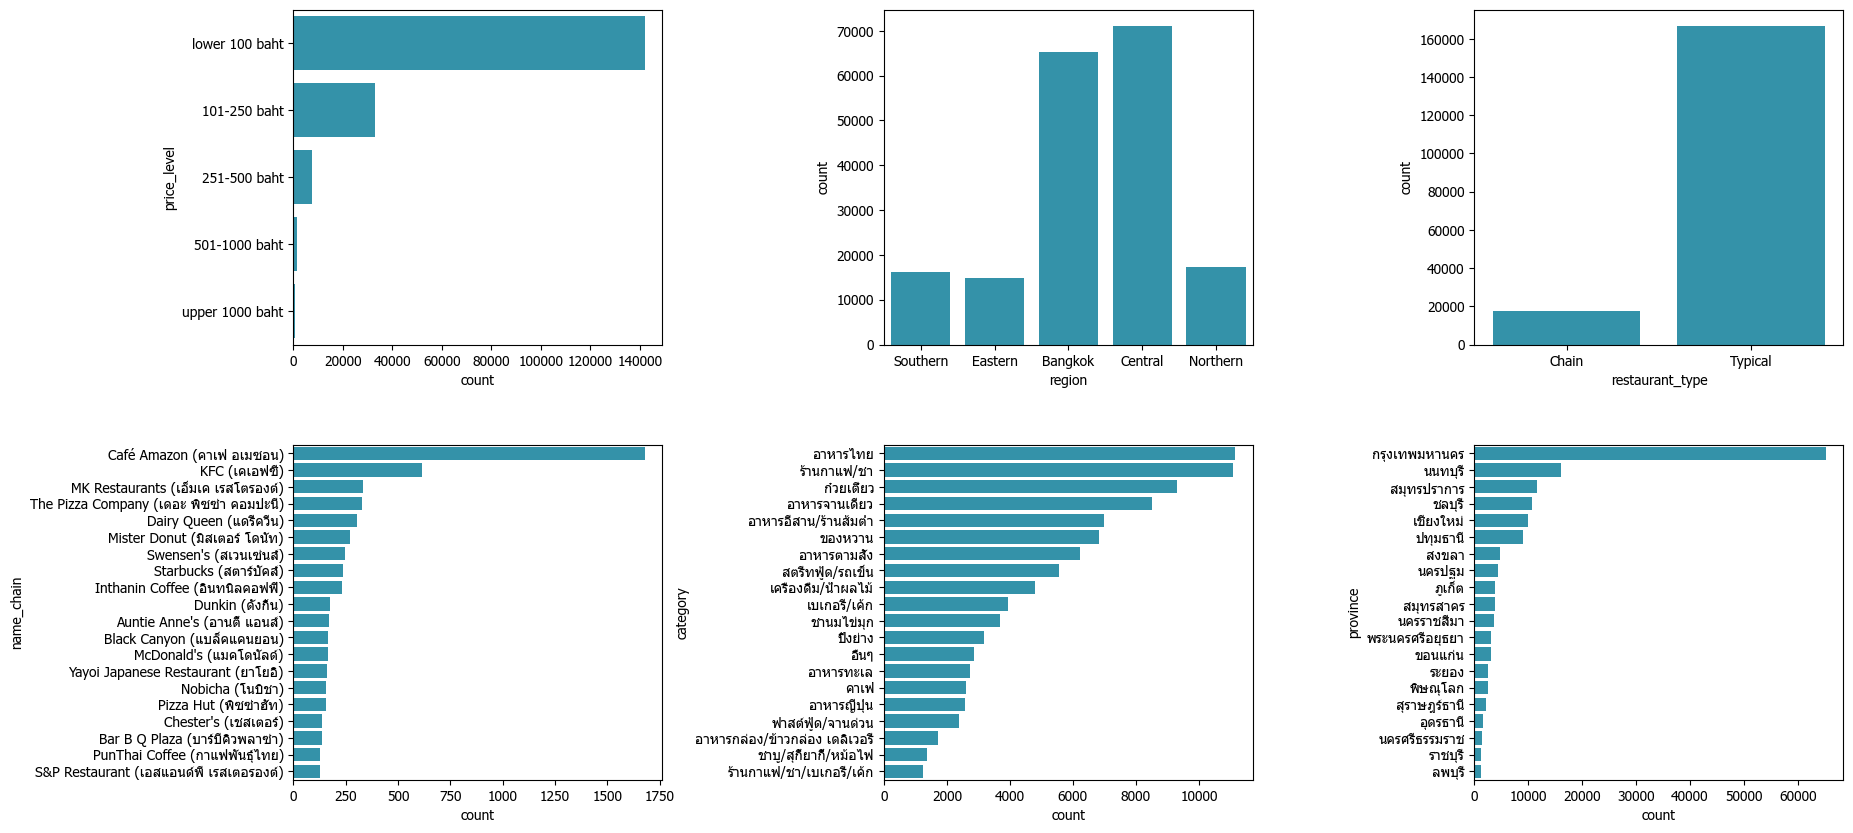

In [289]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10), gridspec_kw={'wspace': 0.6, 'hspace': 0.3})

sns.countplot(y= "price_level",
            data= df,
            orient= "h",
            color= "#219ebc",
            ax= axs[0,0])

sns.countplot(x= "region",    
            #hue= "restaurant_type",
            data= df,
            color= "#219ebc",
            ax= axs[0,1])

sns.countplot(x= "restaurant_type",
              data= df,
              color= "#219ebc",
              ax= axs[0,2])

sns.barplot(x= df["category"].value_counts().head(20),
            y= df["category"].value_counts().head(20).index,
            orient= "h",
            color= "#219ebc",
            ax= axs[1,1])

sns.barplot(x= df["name_chain"].value_counts().head(20),
            y= df["name_chain"].value_counts().head(20).index,
            orient= "h",
            color= "#219ebc",
            ax= axs[1,0])

sns.barplot(x= df["province"].value_counts().head(20),
            y= df["province"].value_counts().head(20).index,
            orient= "h",
            color= "#219ebc",
            ax= axs[1,2])

`price_level column` 
- Most of the restaurant have the price range lower 100 bath.

`region column`
- Most of the restaurants are cluster in Central region followed by Bangkok.
- There are a small gap of Northern, Eastern, and Sountern.

`restaurant type column`
- As usual there is a huge difference in total number of chain restarants and typical restaurants.

`category column`
- "Thai food" id the most abundant restaurants.
- a liitle bit surprise that coffe shop/ tea house got 2nd place.
- the Noodle is over Rice Dish.
- Isan food is 4th.

`name_chain column`
- Cafe Amazon is by far the largest chain in the app.
- follow 2nd and 3rd is the KFC and MK, They are both well known and strong brand in Thailand.

`province column`
- Bangkok got the most in restaurant number followed by Nonthaburi and Samuth Pragan are 2nd and 3rd respectively.
- Chaing Mai are top five among the central regions.

#### Numeric Columns

In [205]:
df.query("rating > 0")[["rating", "reviews_nr"]].describe()

,rating,reviews_nr
count,51631.000000,51631.000000
mean,3.731156,14.089578
std,0.527002,32.303168
min,1.000000,0.000000
25%,3.380000,2.000000
50%,3.790000,5.000000
75%,4.000000,13.000000
max,5.000000,975.000000


From the descriptive table

- the rating column
    - half of the restaurant rating (50%) is 0.
- the reviews_nr column
    - 75% of the restaurants received a very few number of review mostly range from 0-2.

We could do these following lists to handle with the issues above
1. determine the restaurant that actually received 0 rating by consider the number review that equal 0 from reviews_nr column.
    - we may consider to impute the 0 rating with median if we can appropriately sort out the actual 0 rating.
2. categorize reviews_nr column into a group and plot vs rating to see thier relationship.

<Axes: xlabel='reviews_nr', ylabel='Count'>

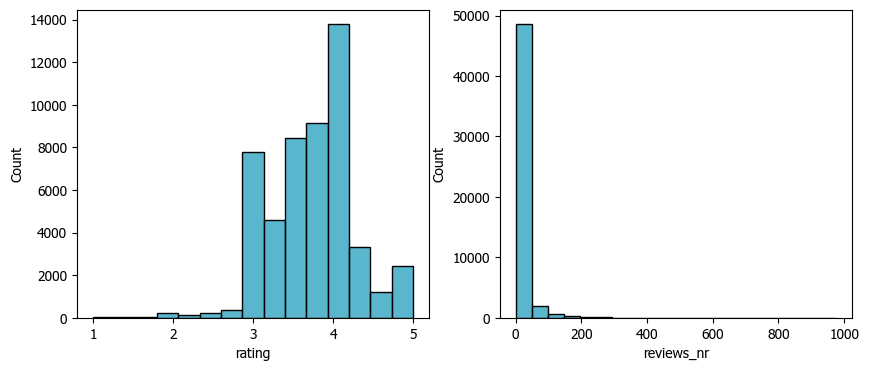

In [25]:
fig, axs = plt.subplots(ncols= 2, figsize = (10 ,4), gridspec_kw= {"wspace" : 0.2, "hspace" : 0.1})

sns.histplot(x= "rating",
             data= df.query("rating > 0"),
             bins= 15,
             color= "#219ebc",
             ax= axs[0])

sns.histplot(x= "reviews_nr",
             data= df.query("rating > 0"),
             bins= 20,
             color= "#219ebc",
             ax= axs[1])

From the above illustrates, before visualization I decided to not include the restaurants with 0 rating in the data, due to a large portion of 0 in rating column. 

Multivariate Analysis

In [14]:
df["rating"].corr(df["reviews_nr"], method= "spearman")

0.8196537629108565

the correlation between "rating and "reviews_nr" columns is 0.81 which is highly positive correlated

create categorical column from reviews_nr to see the clear trend.

In [20]:
# create categorical column for reviews_nr
df["num_reviews"] = pd.cut(df["reviews_nr"], [0, 2, 5, 13, 975], labels= ["1-2 review", "3-5 review", "6-13 review", "14+ review"])

<Axes: xlabel='num_reviews', ylabel='rating'>

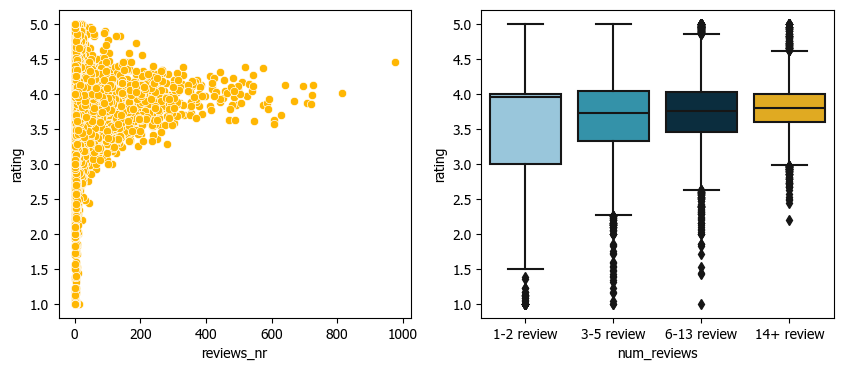

In [31]:
fig, axs = plt.subplots(ncols= 2, figsize = (10 ,4), gridspec_kw= {"wspace" : 0.2, "hspace" : 0.1})
colors = ["#8ecae6","#219ebc", "#023047", "#ffb703", "#fb8500"]

sns.scatterplot(x= "reviews_nr",
                y= "rating",
                data= df.query("rating > 0"),
                color= colors[3],
                ax= axs[0])

sns.boxplot(y= "rating",
            x= "num_reviews",
                data= df.query("rating > 0"),
                palette= colors,
                ax= axs[1])

- From the 1st chart, it is hardly to detech a clear trend. 

- After categorize the reviews_nr in the 2nd chart, the positive trend sligthly appears.

### 3. K-Means Clustering

Method:
1. Scaling the "rating" and "reviews_nr" columns.

2. perform the Elbow method to determine range of K values.

3. train K-means model each k values.

4. evaluate model using Silhouette score to select optimal k.

5. visualize the result.

Scaling data.

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df[['rating', 'reviews_nr']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Define range of K via the Elbow method.

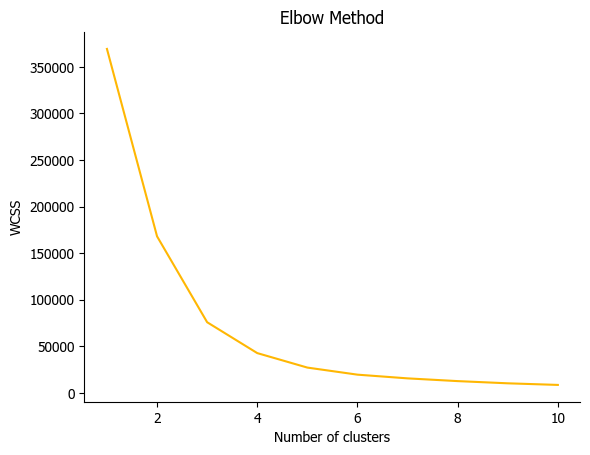

In [33]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, color= "#ffb703")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

the range for K value is 3 to 5.

Train and evaluate the model.

In [243]:
# Choose range of k based on the elbow method
k = (3, 4, 5) 

modelScore = []

# Train the K-means model
for n in k:
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Calculate the Silhouette Score
    silhouette_avg = silhouette_score(X, clusters)

    modelScore.append({f"K: {n}" : round(silhouette_avg, 3)})

print(modelScore)

[{'K: 3': 0.633}, {'K: 4': 0.673}, {'K: 5': 0.706}]


from the results K = 5 gives us the highest score.

Select the the optimal K.

In [34]:
# select the optimal K 
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster label to dataset
df['cluster'] = clusters

Naming each clusters.

In [35]:
# set the multiple conditions
conditions = [df['cluster'] == 0,
              df['cluster'] == 1,
              df['cluster'] == 2,
              df['cluster'] == 3,
              df['cluster'] == 4]

# set the results the respectively match with the above conditions.
choices = ["New", "Promising", "Fair", "Recommended", "Good Picks"]
df['cluster'] = np.select(conditions, choices, default = None)

The cluster names:
- Recommended: popular restaurants with high rating and reviews.

- Good Picks: restaurants with well-rated and good reviews.

- Promissing: medium restaurants with potential.

- Fair: restaurants with few reviews.

- New: restaurants haven't received any customer reviews.

Visualize the result.

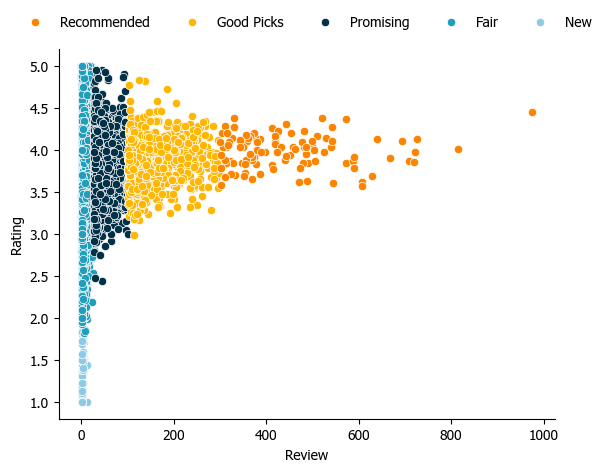

In [36]:
colors = ["#8ecae6","#219ebc", "#023047", "#ffb703", "#fb8500"]

new = plt.scatter(df.query("rating > 0 & cluster == 'New'")["reviews_nr"], 
                  df.query("rating > 0 & cluster == 'New'")["rating"], 
                  color= colors[0], 
                  linewidth=0.5,
                  edgecolors= "white")

fair = plt.scatter(df.query("rating > 0 & cluster == 'Fair'")["reviews_nr"], 
                   df.query("rating > 0 & cluster == 'Fair'")["rating"], 
                   color= colors[1],
                   linewidth=0.5, 
                   edgecolors= "white")

promising = plt.scatter(df.query("rating > 0 & cluster == 'Promising'")["reviews_nr"], 
                        df.query("rating > 0 & cluster == 'Promising'")["rating"], 
                        color= colors[2], 
                        linewidth=0.5,
                        edgecolors= "white")

goodPick = plt.scatter(df.query("rating > 0 & cluster == 'Good Picks'")["reviews_nr"], 
                       df.query("rating > 0 & cluster == 'Good Picks'")["rating"], 
                       color= colors[3],
                       linewidth=0.5, 
                       edgecolors= "white")

recommend = plt.scatter(df.query("rating > 0 & cluster == 'Recommended'")["reviews_nr"],
                        df.query("rating > 0 & cluster == 'Recommended'")["rating"],
                        color= colors[4], 
                        linewidth=0.5,
                        edgecolors= "white")

plt.legend((recommend, goodPick, promising, fair, new),
           ("Recommended", "Good Picks", "Promising", "Fair", "New"),
           bbox_to_anchor=(0.5, 1.04),
           loc="lower center",
           borderaxespad=0,
           frameon=False,
           ncol = 5)

#plt.title('Restaurant Clusters', y= 1.11)
plt.xlabel("Review")
plt.ylabel("Rating")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


In [40]:
round(df["cluster"].value_counts(normalize= True) * 100,2)

cluster
New            72.07
Fair           24.57
Promising       2.80
Good Picks      0.50
Recommended     0.06
Name: proportion, dtype: float64

the largest proportion is New (72.07%) and the smallest is Recommended (0.06%).

This infomation will allow us to offer the services to the right groups:
- for the POS solution I suggest send an offer to Recommended and Good Picks groups.

- Fair and Promising, we can offer ads placement on the application.

## Dimensional Data Modeling

#### Create Dimension Tables

Restaurant Dimension Table

In [19]:
# create new data table for restaurant dimension
restaurant_dim = df[["gid", "name"]]

Location Dimension Table

In [20]:
# create function to merge values from multiple columns
def concat_column(df):
    return df["region"] + "/" + df["province"] + "/" + df["district"] + "/" + df["sub_district"] + "/" + df["province_eng"]

In [21]:
# replace NA values in district and sub-district columns
df[["district", "sub_district"]] = df[["district", "sub_district"]].fillna("Not Staged")

# subset data
location_dim = df[["region", "province", "district", "sub_district", "province_eng"]]
location_dim["location"] = location_dim.apply(concat_column, axis= 1)                                       # apply function
location_dim = location_dim.loc[~location_dim.duplicated(subset= "location")].reset_index(drop= True)       # drop duplicate
location_dim["location_id"] = location_dim.index                                                            # set location_id

In [46]:
location_dim

,region,province,district,sub_district,province_eng,location,location_id
0,Southern,นราธิวาส,เมืองนราธิวาส,บางนาค,Narathiwat,Southern/นราธิวาส/เมืองนราธิวาส/บางนาค/Narathiwat,0
1,Southern,นราธิวาส,เมืองนราธิวาส,ลำภู,Narathiwat,Southern/นราธิวาส/เมืองนราธิวาส/ลำภู/Narathiwat,1
2,Southern,นราธิวาส,เมืองนราธิวาส,โคกเคียน,Narathiwat,Southern/นราธิวาส/เมืองนราธิวาส/โคกเคียน/Narat...,2
3,Southern,นราธิวาส,เมืองนราธิวาส,กะลุวอเหนือ,Narathiwat,Southern/นราธิวาส/เมืองนราธิวาส/กะลุวอเหนือ/Na...,3
4,Southern,นราธิวาส,เมืองนราธิวาส,Not Sated,Narathiwat,Southern/นราธิวาส/เมืองนราธิวาส/Not Sated/Nara...,4
...,...,...,...,...,...,...,...
1257,Central,กาญจนบุรี,Not Sated,Not Sated,Kanchanaburi,Central/กาญจนบุรี/Not Sated/Not Sated/Kanchana...,1257
1258,Central,ราชบุรี,เมืองราชบุรี,หลุมดิน,Ratchaburi,Central/ราชบุรี/เมืองราชบุรี/หลุมดิน/Ratchaburi,1258
1259,Central,ราชบุรี,เมืองราชบุรี,เจดีย์หัก,Ratchaburi,Central/ราชบุรี/เมืองราชบุรี/เจดีย์หัก/Ratchaburi,1259
1260,Central,ราชบุรี,เมืองราชบุรี,ดอนตะโก,Ratchaburi,Central/ราชบุรี/เมืองราชบุรี/ดอนตะโก/Ratchaburi,1260


Cluster Dimension Table

In [27]:
cluster_dim = df[["cluster"]].drop_duplicates().reset_index(drop= True)             # crate table and drop duplicate
cluster_dim["cluster_id"] = cluster_dim.index                                       # set cluster_id

In [29]:
cluster_dim

,cluster,cluster_id
0,Fair,0
1,New,1
2,Promising,2
3,Good Picks,3
4,Recommended,4


Category Dimension Table

In [30]:
category_dim = df[["category"]].drop_duplicates().reset_index(drop= True)
category_dim["category_id"] = category_dim.index                                        # set category_id

In [32]:
category_dim

,category,category_id
0,ของหวาน/เบเกอรี/เค้ก,0
1,ก๋วยเตี๋ยว,1
2,อาหารจานเดียว,2
3,ร้านกาแฟ/ชา,3
4,เบเกอรี/เค้ก,4
...,...,...
9001,ชาบู/สุกี้ยากี้/หม้อไฟ/ปิ้งย่าง/อาหารตามสั่ง,9001
9002,บุฟเฟ่ต์/อาหารนานาชาติ/อาหารฟิวชั่น,9002
9003,สเต๊ก/อาหารเกาหลี/อาหารอเมริกัน,9003
9004,อาหารฟิวชั่น/อาหารญี่ปุ่น/เบเกอรี/เค้ก,9004


Price Level Dimension Table

In [33]:
price_level_dim = df[["price_level"]].drop_duplicates().reset_index(drop= True)
price_level_dim["price_level_id"] = price_level_dim.index                               # set price_level_id

In [35]:
price_level_dim

,price_level,price_level_id
0,lower 100 baht,0
1,101-250 baht,1
2,251-500 baht,2
3,501-1000 baht,3
4,upper 1000 baht,4


Chain Dimension Table

In [37]:
chain_dim = df[["name_chain"]].dropna().drop_duplicates().reset_index(drop= True)
chain_dim["chain_id"] = chain_dim.index                                                     # set chain_id

In [39]:
chain_dim

,name_chain,chain_id
0,Mister Donut (มิสเตอร์ โดนัท),0
1,Dairy Queen (แดรี่ควีน),1
2,ชายสี่บะหมี่เกี๊ยว,2
3,Dayicecream,3
4,Muanchon Coffee (กาแฟมวลชน),4
...,...,...
2060,Gyu-Kaku Japanese BBQ (กิวคาขุ),2060
2061,Mrs.Balbir’,2061
2062,Hooters (ฮูเตอร์ส),2062
2063,JW marriott,2063


#### Create Fact Tables

In [40]:
# create location column will be used to merge the location_dim table
df["location"] = df.apply(concat_column, axis=1)

In [41]:
# create fact_table by merging all the dimensions table with the original dataframe
fact_table = df.merge(location_dim, on="location") \
               .merge(cluster_dim, on="cluster") \
               .merge(category_dim, on="category") \
               .merge(price_level_dim, on= "price_level") \
               .merge(chain_dim, on= "name_chain", how="left") # using left join to inclues typical restaurants

In [42]:
# subset only neccessary columns
fact_table = fact_table[["gid", "location_id", "cluster_id", "category_id", "price_level_id", "chain_id", "rating", "reviews_nr"]]

In [43]:
fact_table

,gid,location_id,cluster_id,category_id,price_level_id,chain_id,rating,reviews_nr
0,09VwpBTRUiuSWzlHXurkDECu4nYpEF,0,0,0,0,0.0,3.09,2
1,09VwpBTRGtVaL62Tl5Aa9FM5p9p9fd,25,0,0,0,NaN,3.77,12
2,09VwpBTRUyWJ8cmeIHafV1K6CnAA67,27,0,0,0,0.0,3.54,8
3,09VxEAUFOal1ITJcBOeZlRLc5R9mzF,27,0,0,0,NaN,4.01,3
4,09VxIwdxTfU4QO84RFDj5gaIVw7yPx,27,0,0,0,NaN,4.00,1
...,...,...,...,...,...,...,...,...
184640,09VwpBTRTQLuTUeOtFMTDqCbKCwhbH,620,2,8725,4,NaN,4.17,55
184641,09VwpBTRK3E8BU1sxaL1eLhdEIANNL,1187,2,8148,4,1891.0,4.40,41
184642,09VwpBTRIPmjuaJVA2zPv37BkMfhC9,201,3,2938,4,NaN,4.08,139
184643,09VwpBTROvxeAsWcuSAX7SU1W7foO6,343,3,8444,4,NaN,4.06,123


#### Export all the tables as CSV file

In [ ]:
fact_table.to_csv("review.csv")
restaurant_dim.to_csv("restaurant.csv")
location_dim.to_csv("location.csv")
price_level_dim.to_csv("price_level.csv")
category_dim.to_csv("category.csv")
cluster_dim.to_csv("cluster.csv")
chain_dim.to_csv("chain.csv")

After done exporting, I will use R (the codes are available in the same folder) to upload all the csv files into the PosgreSQL cloud database on [Neon platform](https://console.neon.tech/).